<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Test Uniform, Default and Xavier Initialization on MNIST w/ TANH Activation</h1>


<h2>Table of Contents</h2>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Make">Make Some Data</a></li>
    <li><a href="#Cost">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Train">Test Uniform, Default and Xavier Initialization</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>

<hr>


<h2>Preparation</h2>


In [1]:
import matplotlib.pylab as plt
import numpy as np

# Using the following line code to install the torchvision library
# !mamba install -y torchvision
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import DataLoader

torch.manual_seed(0)

<h2 id="Model">Neural Network Module and Training Function</h2> 


In [2]:
# Define the neural network with Xavier initialization

class Net_Xavier(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [3]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [4]:
# Define the neural network with Default initialization

class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [5]:
# function to Train the model

def train(model, criterion, train_loader, validation_loader,
          optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss':[], 'validation_accuracy':[]}
    
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
        
    return loss_accuracy

<h2 id="Makeup_Data">Make Some Data</h2> 


In [6]:
# Create the train dataset
train_dataset = dsets.MNIST(root = './data', train = True,
                            download = True, transform = transforms.ToTensor())

# Create the validation dataset
validation_dataset = dsets.MNIST(root = './data', train = False, 
                                 download = True, transform = transforms.ToTensor())

In [7]:
# Create Dataloader for both train dataset and validation dataset

train_loader = DataLoader(dataset = train_dataset,
                          batch_size = 2000, shuffle = True)

validation_loader = DataLoader(dataset = validation_dataset, 
                               batch_size = 5000, shuffle = False)

<h2 id="Cost">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 


In [8]:
# Define criterion function

criterion = nn.CrossEntropyLoss()

In [9]:
# Set the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

<h2 id="Train">Test PyTorch Default Initialization, Xavier Initialization, Uniform Initialization</h2> 


In [10]:
# Train the model with default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion,
                         train_loader, validation_loader, optimizer, epochs = epochs)

In [11]:
# Train the model with Xavier initialization

model_Xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr = learning_rate)
training_results_Xavier = train(model_Xavier, criterion,
                                train_loader, validation_loader, optimizer, epochs = epochs)

In [13]:
# Train the model with Uniform initialization

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr = learning_rate)
training_results_Uniform = train(model_Uniform, criterion,
                                 train_loader, validation_loader, optimizer, epochs = epochs)

<h2 id="Result">Analyse Results</h2> 


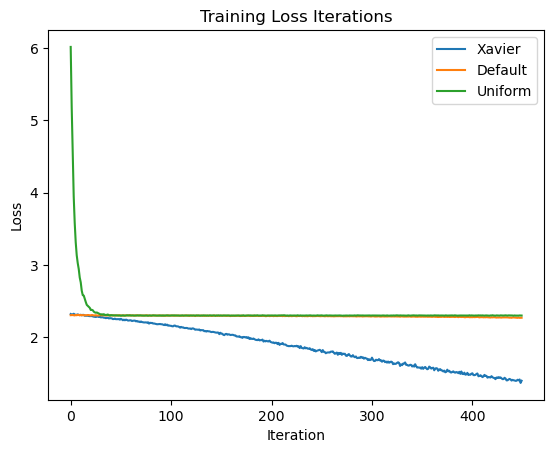

In [15]:
# Plot the loss

plt.plot(training_results_Xavier['training_loss'], label = 'Xavier')
plt.plot(training_results['training_loss'], label = 'Default')
plt.plot(training_results_Uniform['training_loss'], label = 'Uniform')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.title('Training Loss Iterations')
plt.legend()
plt.show()

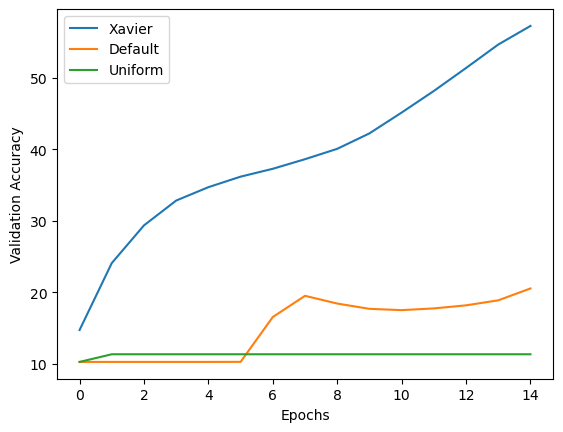

In [16]:
# Plot the accuracy

plt.plot(training_results_Xavier['validation_accuracy'], label = 'Xavier')
plt.plot(training_results['validation_accuracy'], label = 'Default')
plt.plot(training_results_Uniform['validation_accuracy'], label = 'Uniform')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()